### SHRED for ROMs

We first randomly select 3 sensor locations and set the trajectory length (lags) to 52, which is hyperparameter tuned.

In [12]:
import os
import numpy as np
import scipy.io as sio
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.animation as animation

#data_dir = Path(os.getcwd()).parent / 'datasets' / 'plasma'
data_dir = Path(os.getcwd()).parent.parent / 'plasmaSHRED_Nathan'

u_total = np.load(data_dir / 'u_total.npy')
v_total = np.load(data_dir / 'v_total.npy')
s_total = np.load(data_dir / 's_total.npy')

print("u_total.shape", u_total.shape)
print("s_total.shape", s_total.shape)
print("v_total.shape", v_total.shape)


k = s_total.shape[0]
r = s_total.shape[1]
nx = 257
ny = 256

print("k", k)
print("r", r)



u_total.shape (65792, 280)
s_total.shape (14, 20)
v_total.shape (280, 2000)
k 14
r 20


u_total (65792, 280)
s_total (14, 20)
v_total (280, 2000)
u 0 20
v 0 20
upca (65792, 20)
spca (20,)
vpca (20, 2000)
u (65792, 2000)
u[:,-1] (65792,)
snap_true (257, 256)

u_total (65792, 280)
s_total (14, 20)
v_total (280, 2000)
u 20 40
v 20 40
upca (65792, 20)
spca (20,)
vpca (20, 2000)
u (65792, 2000)
u[:,-1] (65792,)
snap_true (257, 256)

u_total (65792, 280)
s_total (14, 20)
v_total (280, 2000)
u 40 60
v 40 60
upca (65792, 20)
spca (20,)
vpca (20, 2000)
u (65792, 2000)
u[:,-1] (65792,)
snap_true (257, 256)

u_total (65792, 280)
s_total (14, 20)
v_total (280, 2000)
u 60 80
v 60 80
upca (65792, 20)
spca (20,)
vpca (20, 2000)
u (65792, 2000)
u[:,-1] (65792,)
snap_true (257, 256)

u_total (65792, 280)
s_total (14, 20)
v_total (280, 2000)
u 80 100
v 80 100
upca (65792, 20)
spca (20,)
vpca (20, 2000)
u (65792, 2000)
u[:,-1] (65792,)
snap_true (257, 256)

u_total (65792, 280)
s_total (14, 20)
v_total (280, 2000)
u 100 120
v 100 120
upca (65792, 20)
spca (20,)
vpca (20, 2000)
u (65792, 200

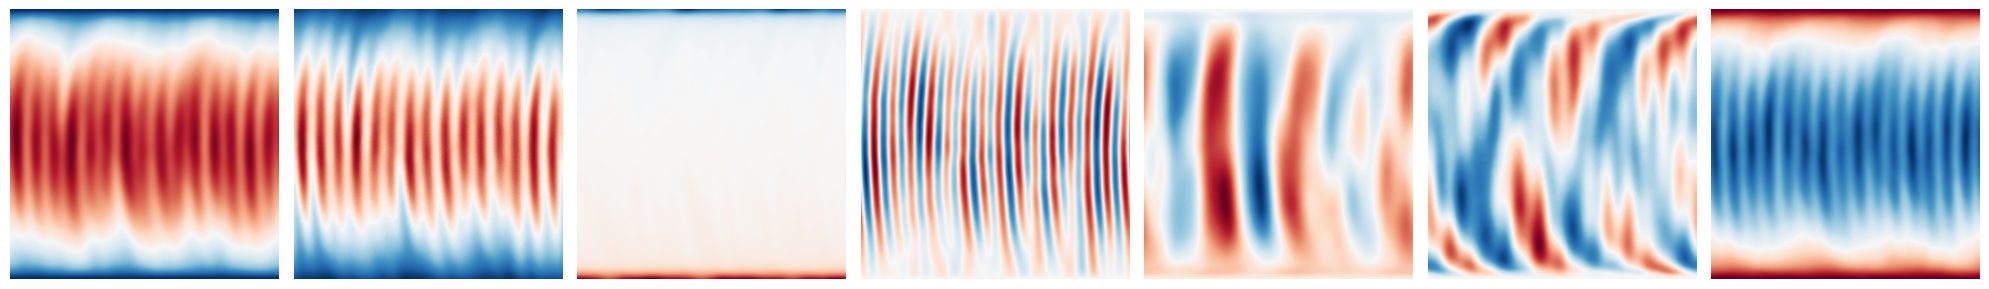

u_total (65792, 280)
s_total (14, 20)
v_total (280, 2000)
u 140 160
v 140 160
upca (65792, 20)
spca (20,)
vpca (20, 2000)
u (65792, 2000)
u[:,-1] (65792,)
snap_true (257, 256)

u_total (65792, 280)
s_total (14, 20)
v_total (280, 2000)
u 160 180
v 160 180
upca (65792, 20)
spca (20,)
vpca (20, 2000)
u (65792, 2000)
u[:,-1] (65792,)
snap_true (257, 256)

u_total (65792, 280)
s_total (14, 20)
v_total (280, 2000)
u 180 200
v 180 200
upca (65792, 20)
spca (20,)
vpca (20, 2000)
u (65792, 2000)
u[:,-1] (65792,)
snap_true (257, 256)

u_total (65792, 280)
s_total (14, 20)
v_total (280, 2000)
u 200 220
v 200 220
upca (65792, 20)
spca (20,)
vpca (20, 2000)
u (65792, 2000)
u[:,-1] (65792,)
snap_true (257, 256)

u_total (65792, 280)
s_total (14, 20)
v_total (280, 2000)
u 220 240
v 220 240
upca (65792, 20)
spca (20,)
vpca (20, 2000)
u (65792, 2000)
u[:,-1] (65792,)
snap_true (257, 256)

u_total (65792, 280)
s_total (14, 20)
v_total (280, 2000)
u 240 260
v 240 260
upca (65792, 20)
spca (20,)
vpca (20,

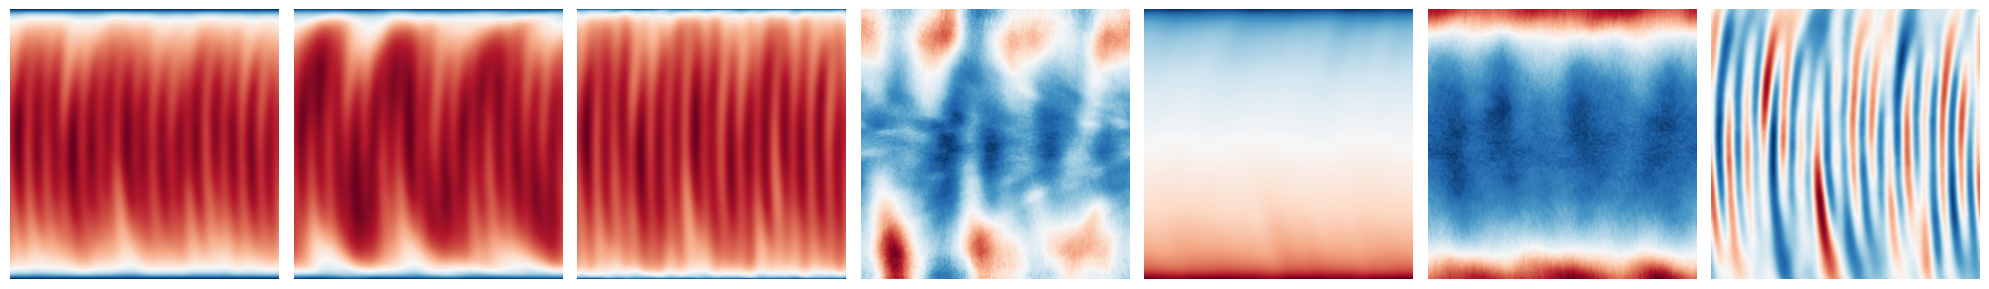

In [13]:

loop1=[0,1,2,3,4,5,6]
loop2=[7,8,9,10,11,12,13]

for loop in [loop1, loop2]:
    fig = plt.figure(figsize=(20, 20))
    for k in loop:
        ax = fig.add_subplot(1, 7, (k%7)+1)
        upca = u_total[:, k*r:(k+1)*r]
        spca = s_total[k, :]
        vpca = v_total[k*r:(k+1)*r, :]

        if 1:
            print("u_total", u_total.shape)
            print("s_total", s_total.shape)
            print("v_total", v_total.shape)

            print("u", k*r, (k+1)*r)
            print("v", k*r, (k+1)*r)

            print("upca", upca.shape)
            print("spca", spca.shape)
            print("vpca", vpca.shape)

        u = upca @ np.diag(spca) @ vpca
        snap_true = u[:, -1].reshape((nx, ny))
        
        if 1:
            print("u", u.shape)
            print("u[:,-1]", u[:,-1].shape)
            print("snap_true", snap_true.shape)

        ax.imshow(snap_true,cmap='RdBu_r', interpolation='bilinear')
        ax.axis('off')
        plt.tight_layout()

        print()

    plt.show()
    plt.close()

